# Proyek Analisis Data: Brazillian E - Commerce
- **Nama:** Mochammad Fikri Haikal Rohman
- **Email:** haikalnwn996@gmail.com
- **ID Dicoding:** hekalee

## Menentukan Pertanyaan Bisnis

1. Berapa rata-rata waktu pengiriman dari tanggal persetujuan pesanan hingga tanggal diterima pelanggan?
2. Bagaimana distribusi skor review dari pelanggan? Apakah ada pola antara waktu pengiriman dan skor review?
3. Produk apa yang sering dan jarang dibeli ?
4. Bagaimana korelasi antara biaya pengiriman dengan harga produk ?
5. Bagaimana korelasi antara biaya pengiriman dengan ukuran atau berat produk ?
6. Bagaimana kebiasaan berbelanja pelanggan ?



## Import Semua Packages/Library yang Digunakan

In [50]:
# import library
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

In [51]:
# mengizinkan notebook untuk membuka akses Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Wrangling

### Gathering Data

In [52]:
customers_df = pd.read_csv('./drive/MyDrive/Colab Notebooks/Dicoding Data Analyst/olist_customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [53]:
sellers_df = pd.read_csv('./drive/MyDrive/Colab Notebooks/Dicoding Data Analyst/olist_sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [54]:
products_df = pd.read_csv('./drive/MyDrive/Colab Notebooks/Dicoding Data Analyst/olist_products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [55]:
geolocation_df = pd.read_csv('./drive/MyDrive/Colab Notebooks/Dicoding Data Analyst/olist_geolocation_dataset.csv')
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [56]:
product_category_name_translation_df = pd.read_csv('./drive/MyDrive/Colab Notebooks/Dicoding Data Analyst/product_category_name_translation.csv')
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [57]:
orders_df = pd.read_csv('./drive/MyDrive/Colab Notebooks/Dicoding Data Analyst/olist_orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [58]:
order_items_df = pd.read_csv('./drive/MyDrive/Colab Notebooks/Dicoding Data Analyst/olist_order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [59]:
order_reviews_df = pd.read_csv('./drive/MyDrive/Colab Notebooks/Dicoding Data Analyst/olist_order_reviews_dataset.csv')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [60]:
order_payments_df = pd.read_csv('./drive/MyDrive/Colab Notebooks/Dicoding Data Analyst/olist_order_payments_dataset.csv')
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


### Assessing Data

In [61]:
customers_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [62]:
sellers_df.describe(include='all')

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [63]:
products_df.describe(include='all')

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [64]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [65]:
orders_df.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [66]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [67]:
order_items_df.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


In [68]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [69]:
order_payments_df.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [70]:
# mencari selisih data order yang produknya valid dan tidak
order_product = pd.merge(
    left=order_items_df,
    right=products_df,
    how='inner',
    left_on='product_id',
    right_on='product_id'
)

order_product.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000,111047,111047.000000,111047.000000,111047.000000,112632.000000,112632.000000,112632.000000,112632.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN,11115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320,NaN,48.775978,787.867029,2.209713,2093.672047,30.153669,16.593766,22.996546
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405,NaN,10.025581,652.135608,1.721438,3751.596884,16.153449,13.443483,11.707268
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000,NaN,42.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000,NaN,52.000000,603.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000,NaN,57.000000,987.000000,3.000000,1800.000000,38.000000,20.000000,30.000000


### Cleaning Data

In [71]:
# seleksi baris yang product_category_name kosong
empty_index = products_df[products_df.product_category_name.isna()].index

# menghapus data yang telah diseleksi
products_df.drop(index=empty_index, inplace=True)

# cek kekosongan data product_category_name
products_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,1
product_length_cm,1
product_height_cm,1
product_width_cm,1


In [72]:
# convert tipe data kolom yang belum sesuai
date_column = [
    'order_purchase_timestamp', 'order_approved_at',
    'order_delivered_carrier_date', 'order_delivered_customer_date',
    'order_estimated_delivery_date'
    ]

for column in date_column:
  orders_df[column] = pd.to_datetime(orders_df[column])

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


**Order Items**

In [73]:
# convert tipe tata yang tidak sesuai
order_items_df['shipping_limit_date'] = pd.to_datetime(
    order_items_df['shipping_limit_date']
    )

order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [74]:
# mencari data order yang produknya tidak ada pada data produk
product_ids = products_df.product_id.tolist()

order_items_df['is_valid_product'] = order_items_df.product_id.apply(lambda x: True if x in product_ids else False)
order_items_df.groupby(by='is_valid_product').order_id.count()

,order_id
is_valid_product,
False,1603
True,111047


In [75]:
# hapus data yang produknya tidak ada

# seleksi baris yang product_category_name kosong
not_valid_product = order_items_df[order_items_df.is_valid_product == False].index

# menghapus data yang telah diseleksi
order_items_df.drop(index=not_valid_product, inplace=True)

order_items_df.groupby(by='is_valid_product').order_id.count()

,order_id
is_valid_product,
True,111047


In [76]:
# convert tipe data kolom yang belum sesuai
date_column = ['review_creation_date', 'review_answer_timestamp']

for column in date_column:
  order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [77]:
# mencari data review yang tidak valid
order_id_reviews = order_reviews_df.order_id.tolist()
order_reviews_df['is_valid'] = order_reviews_df.order_id.apply(lambda x: True if x in order_id_reviews else False)

In [78]:
order_reviews_df.groupby(by='is_valid').order_id.count()

,order_id
is_valid,
True,99224


In [79]:
# mencari kebiasaan user ketika order ada berapa produk yang dibeli
order_items_df.groupby(
  by='order_id'
).seller_id.nunique().sort_values(
  ascending=False
)

,seller_id
order_id,
cf5c8d9f52807cb2d2f0a0ff54c478da,5
1c11d0f4353b31ac3417fbfa5f0f2a8a,5
8c2b13adf3f377c8f2b06b04321b0925,4
91be51c856a90d7efe86cf9d082d6ae3,4
1d23106803c48c391366ff224513fb7f,4
...,...
55de7dd020b106e53605a949012b60cc,1
55dc0b4a0f13a05eb36a095553d4de55,1
55dac85c562ddd9e05ddeaffa7631a0b,1


## Exploratory Data Analysis (EDA)

In [80]:
o_detail_df = pd.merge(
    left=orders_df,
    right=order_items_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)

o_product = pd.merge(
    left=o_detail_df,
    right=products_df,
    how='left',
    left_on='product_id',
    right_on='product_id'
)

all_df = pd.merge(
    left=o_product,
    right=order_reviews_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)

In [81]:
orders_df.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


**Insight**
* Terdapat 99.441 total order



In [82]:
orders_df.groupby('order_status').order_id.count().sort_values(ascending=False)

,order_id
order_status,
delivered,96478
shipped,1107
canceled,625
unavailable,609
invoiced,314
processing,301
created,5
approved,2


**Insight**
* Terdapat 8 status pesanan
* delivered mendominasi status pada seluruh pesanan yang tercatat dengan total 96.478 pesanan tersampaikan



In [83]:
o_detail_df[o_detail_df['order_status'] == 'delivered'].price.sum()

13050771.480000004

**Insight**
* Terdapat sekitar 13.050.771,48 dolar hasil penjualan yang berhasil terkirim

In [84]:
o_detail_df.groupby('order_id').order_id.count().sort_values(ascending=False)

,order_id
order_id,
8272b63d03f5f79c56e9e4120aec44ef,21
ab14fdcfbe524636d65ee38360e22ce8,20
1b15974a0141d54e36626dca3fdc731a,20
9ef13efd6949e4573a18964dd1bbe7f5,15
428a2f660dc84138d969ccd69a0ab6d5,15
...,...
59de7be8730dc1a20caadff4c7686027,1
59de68e3ef040153cc9ea7978eaec149,1
59de12363514fbd1aca1eeb1b39816a8,1


**Insight**
* 21 produk yang dibeli dalam sekali order merupakan rekor tertinggi pelanggan dalam checkout order

In [85]:
order_reviews_df.review_score.mean()

4.08642062404257

**Insight**
* Rata rata skor yang diberikan oleh pelanggan adalah 4

In [86]:
order_review_df = pd.merge(
    left=orders_df,
    right=order_reviews_df,
    how='inner',
    left_on='order_id',
    right_on='order_id'
)

In [87]:
order_review_df['review_duration'] = (order_review_df.order_delivered_customer_date - order_review_df.review_creation_date).dt.days

order_review_df.drop(order_review_df[order_review_df['review_duration'] < 0].index, inplace=True)

order_review_df['review_duration'].mean()


6.711418269230769

**Insight**
* Rata rata pelanggan memberikan review pada pesanannya adalah sekitar 6 hari setelah pesanan diterima

## Visualization & Explanatory Analysis

In [88]:
customers_df.to_csv('customers.csv', index=False)
sellers_df.to_csv('sellers.csv', index=False)
products_df.to_csv('products.csv', index=False)
orders_df.to_csv('orders.csv', index=False)
order_items_df.to_csv('order_items.csv', index=False)
order_reviews_df.to_csv('order_reviews.csv', index=False)
all_df.to_csv('all_df.csv', index=False)

**1. Analisis Rata-Rata Waktu Pengiriman:**

Pertanyaan: Berapa rata-rata waktu pengiriman dari tanggal persetujuan pesanan hingga tanggal diterima pelanggan?


Rata - rata pengiriman: 11.55871551334238 hari


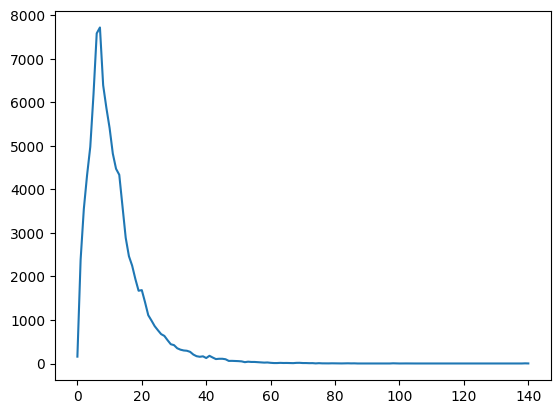

In [89]:
# mencari selisih antara waktu persetujuan pesanan hingga pesanan diterima oleh pelanggan
all_df['delivery_duration'] = (all_df.order_delivered_customer_date - all_df.order_approved_at).dt.days

# mencari data delivery_duration yang tidak sesuai
all_df.drop(all_df[all_df['delivery_duration'] < 0].index, inplace=True)

print("Rata - rata pengiriman: {} hari".format(all_df.delivery_duration.mean()))

# visualisasi distribusi data menggunakan line plot
delivery_duration_df = all_df.groupby(by='delivery_duration').order_id.nunique()
plt.plot(delivery_duration_df.values.tolist())
plt.show()

**Insight:**
Waktu rata - rata pengiriman adalah sekitar **11 hari** setelah pesanan disetujui.

**2. Distribusi Review dan Skor Review**

Pertanyaan: Bagaimana distribusi skor review dari pelanggan? Apakah ada pola antara waktu pengiriman dan skor review?

<ipython-input-90-a0486f4f9ec2>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_score_by_duration = grouped_by_order_id.groupby('delivery_duration_bins')['review_score'].mean()


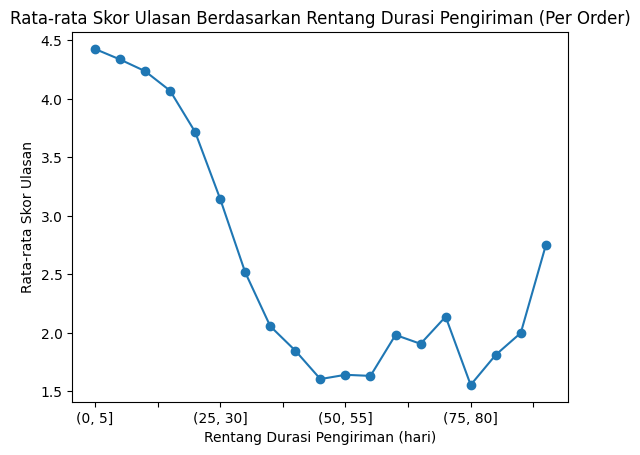

In [90]:
# mengambil hasil rata rata per order_id
grouped_by_order_id = all_df.groupby('order_id').agg({
    'delivery_duration': 'mean',
    'review_score': 'mean'
}).reset_index()

# memecah durasi pengiriman menjadi beberapa bin
grouped_by_order_id['delivery_duration_bins'] = pd.cut(grouped_by_order_id['delivery_duration'], bins=range(0, 100, 5))

# menghitung rata rata score untuk setiap bin
avg_score_by_duration = grouped_by_order_id.groupby('delivery_duration_bins')['review_score'].mean()

# plotting
avg_score_by_duration.plot(kind='line', marker='o')
plt.xlabel('Rentang Durasi Pengiriman (hari)')
plt.ylabel('Rata-rata Skor Ulasan')
plt.title('Rata-rata Skor Ulasan Berdasarkan Rentang Durasi Pengiriman (Per Order)')
plt.show()

**Insight:**
Semakin sedikit durasi pengiriman akan semakin tinggi juga skor yang diberikan.

**3. Produk Terpopuler dan Tidak Topuler**

Pertanyaan: Produk apa yang sering dan jarang dibeli ?

In [91]:
order_item_product = pd.merge(
    left=order_items_df,
    right=products_df,
    left_on='product_id',
    right_on='product_id'
)

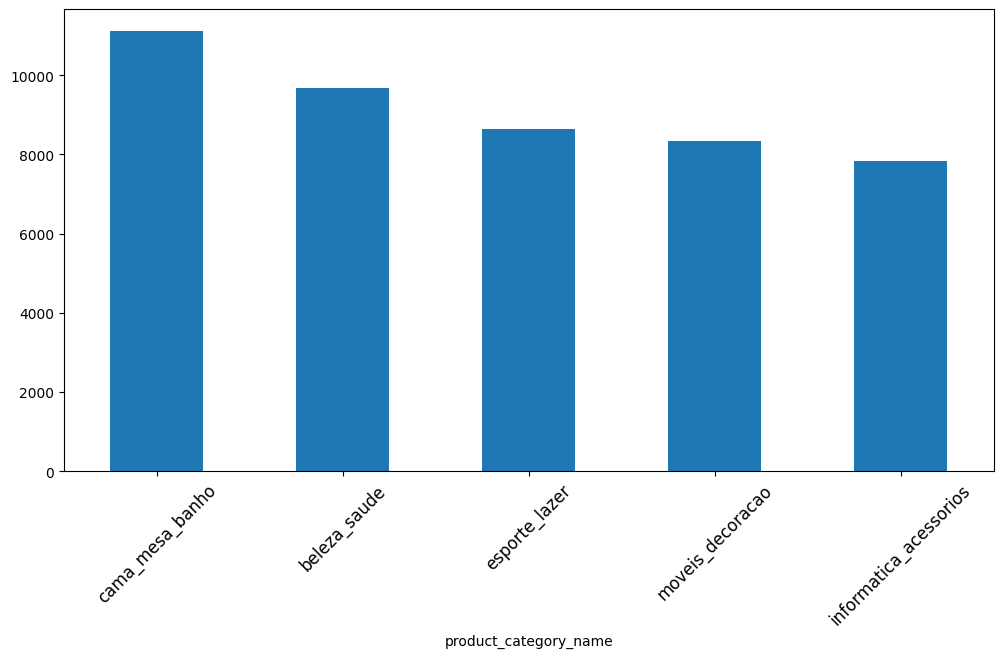

In [92]:
# mengambil 5 produk yang paling banyak dibeli
popular_product = order_item_product['product_category_name'].value_counts().head(5)

# plotting
plt.figure(figsize=(12, 6))
popular_product.plot(kind='bar')
plt.xticks(rotation=45, fontsize=12)
plt.show()

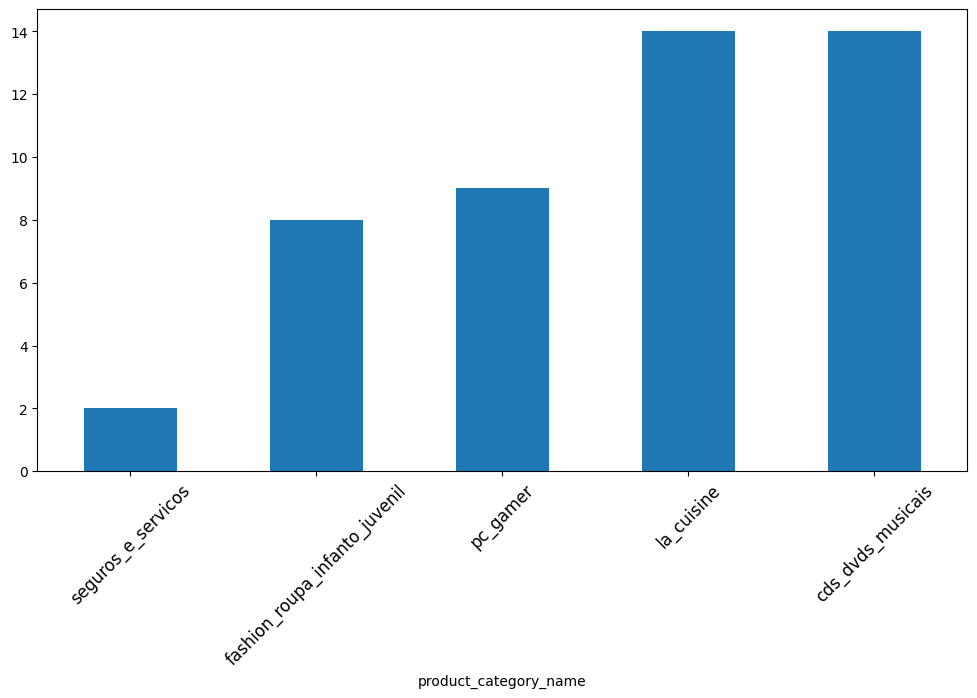

In [93]:
# mengambil 5 produk yang paling jarang dibeli
unpopular_product = all_df['product_category_name'].value_counts().sort_values(ascending=True).head(5)

# Menampilkan visualisasi
plt.figure(figsize=(12, 6))
unpopular_product.plot(kind='bar')
plt.xticks(rotation=45, fontsize=12)
plt.show()

**Insight:**

*Produk Sering Dibeli*:
* Cama Mesa Banho
* Beleza Saude
* Esporte Lazer
* Movies Decoracao
* Informatica Acessoorios

*Produk Jarang Dibeli*:
* Seguros E Servicos
* Fashion Roupa Infanto Juvenil
* PC Gamer
* La Cuisine
* CDS DVDS Musicais

**4. Analisis Biaya Pengiriman (Freight Value) vs Harga Produk:**

Pertanyaan: Bagaimana korelasi antara biaya pengiriman dengan harga produk ?

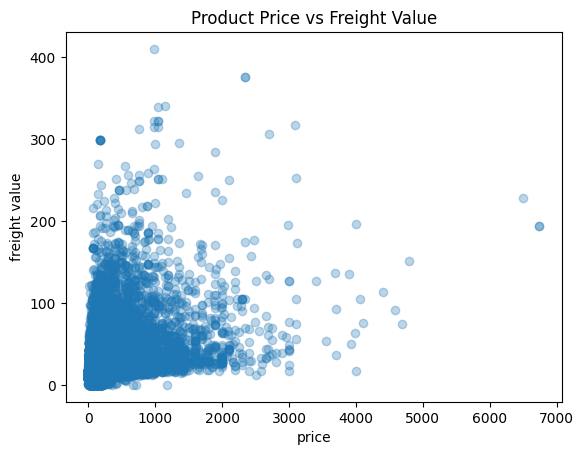

In [94]:
x = order_product.price
y = order_product.freight_value

# plotting
plt.scatter(x, y, alpha=0.3)
plt.xlabel('price')
plt.ylabel('freight value')
plt.title('Product Price vs Freight Value')
plt.show()

**Insight:**
Semakin rendah harga barang maka akan semakin menurun juga biaya pengiriman barang tersebut.

**5. Analisis Hubungan Ukuran Produk dan Biaya Pengiriman:**

Pertanyaan:
Bagaimana korelasi antara biaya pengiriman dengan ukuran atau berat produk ?

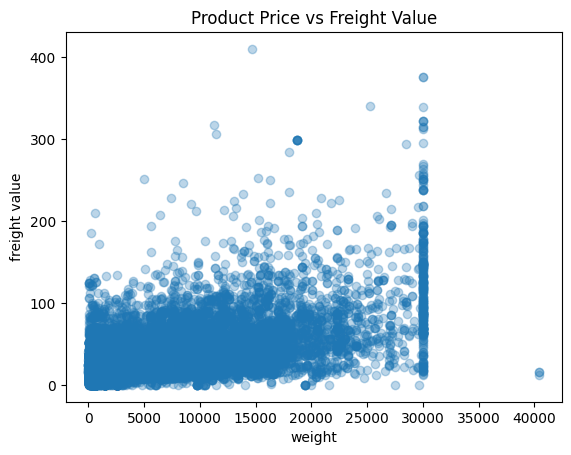

In [95]:
x = order_product.product_weight_g
y = order_product.freight_value

# plotting
plt.scatter(x, y, alpha=0.3)
plt.xlabel('weight')
plt.ylabel('freight value')
plt.title('Product Price vs Freight Value')
plt.show()

**Insight:**
Pada grafik menunjukkan bahwa semakin berat bobot suatu benda maka harga juga akan semakin bertambah

**6. Analisis RFM:**

Pertanyaan:
Bagaimana kebiasaan berbelanja pelanggan ?

In [96]:
# mencari RFM
rfm_df = all_df[all_df['order_status'] == 'delivered'].groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max",
    "order_id": "nunique",
    "price": "sum"
})

# mengubah nama kolom
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

# mencari recency data
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = orders_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

# menghapus temporary kolom
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)

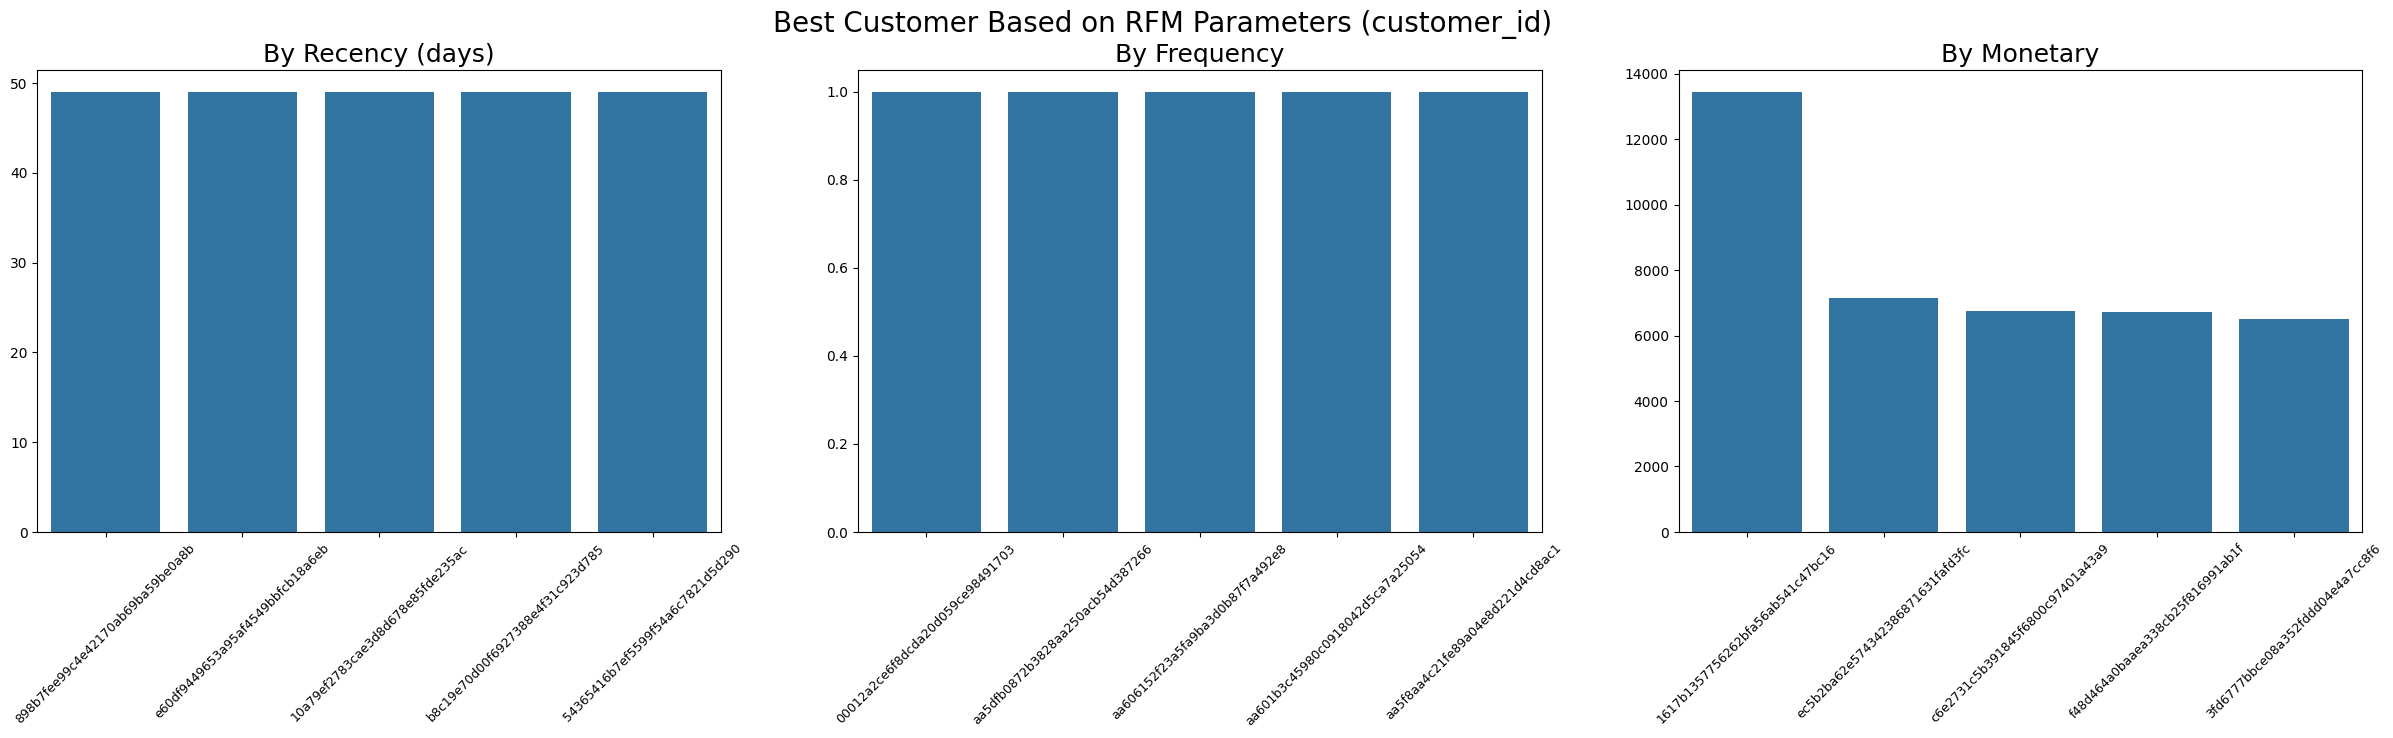

In [97]:
import seaborn as sns
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

# plotting recency
sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=9, rotation=45)

# plotting frequency
sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=9, rotation=45)

# plotting monetary
sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=9, rotation=45)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

**Insight:**

Recency:
Semua pelanggan yang ditampilkan memiliki nilai recency sekitar 50 hari.

Frequency:
Pelanggan-pelanggan ini melakukan transaksi hanya satu kali

Monetary:
 Salah satu pelanggan terlihat memiliki nilai monetary tertinggi, dengan total pembelian sekitar 14.000. Sementara itu, pelanggan lain memiliki nilai yang lebih rendah.


## Conclusion

* Pertanyaan 1:

 Waktu rata - rata pengiriman adalah sekitar **11 hari** setelah pesanan disetujui.

* Pertanyaan 2:

 Semakin sedikit durasi pengiriman akan semakin tinggi juga skor yang diberikan.

* Pertanyaan 3:

  *Produk Sering Dibeli*:
  - Cama Mesa Banho
  - Beleza Saude
  - Esporte Lazer
  - Movies Decoracao
  - Informatica Acessoorios

  *Produk Jarang Dibeli*:
  - Seguros E Servicos
  - Fashion Roupa Infanto Juvenil
  - PC Gamer
  - La Cuisine
  - CDS DVDS Musicais

* Pertanyaan 4:

 Semakin rendah harga barang maka akan semakin menurun juga biaya pengiriman barang tersebut.

* Pertanyaan 5:

 Semakin berat bobot suatu benda maka harga juga akan semakin bertambah.

* Pertanyaan 6:

  Recency:
  Semua pelanggan yang ditampilkan memiliki nilai recency sekitar 50 hari.

  Frequency:
  Pelanggan-pelanggan ini melakukan transaksi hanya satu kali

  Monetary:
  Salah satu pelanggan terlihat memiliki nilai monetary tertinggi, dengan total pembelian sekitar 14.000. Sementara itu, pelanggan lain memiliki nilai yang lebih rendah.
